In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.io.wavfile as wav
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/Bowel_Sound_Data/data.csv')
df.head()

,sr,jitter,shimmer,pitch,hnr,zcr,mfcc,label
0,22050,0.017825,3.615654,301.72330,27.232807,0.009642,-35.699406,1
1,22050,0.039251,2.999469,306.31770,24.489889,0.004333,-35.151886,1
2,22050,0.036580,1.501361,155.15536,24.960632,0.003311,-35.011490,1
3,22050,0.022709,1.912195,381.37710,9.213717,0.005276,-32.480843,1
4,22050,0.058314,3.060950,211.59805,13.171637,0.001908,-13.123498,1


In [ ]:
df.isnull().sum()

,0
sr,0
jitter,0
shimmer,0
pitch,171
hnr,0
zcr,0
mfcc,0
label,0


In [ ]:
df['pitch'].fillna(df['pitch'].median(),inplace=True)
df.isnull().sum()

<ipython-input-10-b5bb3ab92c3a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pitch'].fillna(df['pitch'].median(),inplace=True)


,0
sr,0
jitter,0
shimmer,0
pitch,0
hnr,0
zcr,0
mfcc,0
label,0


In [ ]:
df['label'].value_counts()

,count
label,
1,411
0,242


In [ ]:
df.shape


(653, 8)

In [ ]:
# X = df.drop(columns=['sr','pitch', 'hnr', 'zcr', 'mfcc', 'label'], axis=1)
# X.head()

,jitter,shimmer
0,0.017825,3.615654
1,0.039251,2.999469
2,0.036580,1.501361
3,0.022709,1.912195
4,0.058314,3.060950


In [ ]:
X = df.drop(columns=['sr','zcr','jitter','shimmer', 'pitch', 'label'], axis=1)
X.head()

,hnr,mfcc
0,27.232807,-35.699406
1,24.489889,-35.151886
2,24.960632,-35.011490
3,9.213717,-32.480843
4,13.171637,-13.123498


In [ ]:
Y = df['label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y,random_state=1)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(522, 2) (131, 2) (522,) (131,)


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
X_train_prediction=model.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on Training Data LOGISTICREGRESSION: ',training_accuracy)

Accuracy on Training Data LOGISTICREGRESSION:  0.7145593869731801


In [ ]:
X_test_prediction=model.predict(X_test)
test_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test Data LOGISTICREGRESSION: ',test_accuracy)

Accuracy on test Data LOGISTICREGRESSION:  0.7175572519083969


Accuracy:  0.7151607963246555
0.9221411192214112


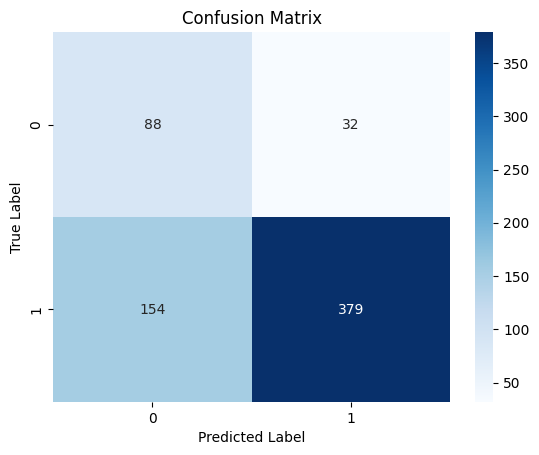

In [ ]:
X_pred= model.predict(X)
accuracy = accuracy_score(X_pred, Y)
print("Accuracy: ", accuracy)
precision = precision_score(X_pred,Y)
print(precision)

cm = confusion_matrix(X_pred, Y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()